## *Import Libraries*

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## *Load Cleaned Data*

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
%time df = pd.read_csv('03_clean_final.csv') # parse_dates = ['FL_DATE'])

Wall time: 13.2 s


In [5]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,DEP_TIME_BLK,TAXI_OUT,WHEELS_ON,TAXI_IN,ARR_DEL15,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DIV_AIRPORT_LANDINGS
0,2019,1,1,3,4,2019-01-03,9E,20363,9E,N195PQ,5121,15412,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,10397,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1140,1205.0,25.0,1.0,1100-1159,30.0,1311.0,4.0,1.0,1200-1259,0.0,0.0,70.0,0
1,2019,1,1,4,5,2019-01-04,9E,20363,9E,N919XJ,5121,15412,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,10397,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1140,1250.0,70.0,1.0,1100-1159,35.0,1403.0,9.0,1.0,1200-1259,0.0,0.0,70.0,0
2,2019,1,1,5,6,2019-01-05,9E,20363,9E,N316PQ,5122,10397,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,956.0,6.0,0.0,0900-0959,20.0,1040.0,3.0,0.0,1000-1059,0.0,0.0,121.0,0
3,2019,1,1,6,7,2019-01-06,9E,20363,9E,N325PQ,5122,10397,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,945.0,-5.0,0.0,0900-0959,16.0,1026.0,3.0,0.0,1000-1059,0.0,0.0,123.0,0
4,2019,1,1,7,1,2019-01-07,9E,20363,9E,N904XJ,5122,10397,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,947.0,-3.0,0.0,0900-0959,25.0,1040.0,4.0,0.0,1000-1059,0.0,0.0,123.0,0


In [6]:
df.shape

(1749099, 41)

In [7]:
df['ORIGIN_CITY_NAME'] = df['ORIGIN_CITY_NAME'].str.split(',', n=1, expand = True)[0]
df['DEST_CITY_NAME'] = df['DEST_CITY_NAME'].str.split(',', n=1, expand = True)[0]

In [8]:
lst = []
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:
            if df[col1].equals(df[col2]) == True:
                lst.append([col1, col2])
lst

[['OP_UNIQUE_CARRIER', 'OP_CARRIER'], ['OP_CARRIER', 'OP_UNIQUE_CARRIER']]

*For predicting if a flight is delayed we cannot use future information like Arrival Data. So we delete the columns*

In [9]:
# 'WHEELS_OFF', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW'
df.drop(['OP_CARRIER', 'OP_CARRIER_AIRLINE_ID', 
         'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_STATE_ABR', 
         'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_ON', 'TAXI_IN',
         'DEST_AIRPORT_ID', 'DEST', 'DEST_STATE_ABR', 
         'ARR_DEL15', 'ARR_TIME_BLK'], axis = 1, inplace = True)

In [10]:
df.shape

(1749099, 27)

In [11]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_CITY_MARKET_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_CITY_MARKET_ID,DEST_CITY_NAME,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DIV_AIRPORT_LANDINGS
0,2019,1,1,3,4,2019-01-03,9E,N195PQ,5121,35412,Knoxville,47,Tennessee,54,30397,Atlanta,13,Georgia,34,1140,1205.0,25.0,1.0,0.0,0.0,70.0,0
1,2019,1,1,4,5,2019-01-04,9E,N919XJ,5121,35412,Knoxville,47,Tennessee,54,30397,Atlanta,13,Georgia,34,1140,1250.0,70.0,1.0,0.0,0.0,70.0,0
2,2019,1,1,5,6,2019-01-05,9E,N316PQ,5122,30397,Atlanta,13,Georgia,34,34783,Springfield,29,Missouri,64,950,956.0,6.0,0.0,0.0,0.0,121.0,0
3,2019,1,1,6,7,2019-01-06,9E,N325PQ,5122,30397,Atlanta,13,Georgia,34,34783,Springfield,29,Missouri,64,950,945.0,-5.0,0.0,0.0,0.0,123.0,0
4,2019,1,1,7,1,2019-01-07,9E,N904XJ,5122,30397,Atlanta,13,Georgia,34,34783,Springfield,29,Missouri,64,950,947.0,-3.0,0.0,0.0,0.0,123.0,0


In [12]:
df.dropna(inplace = True)

*Extract the hour of day from CRS_DEP_TIME*

In [13]:
df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].astype(int).astype(str).apply(lambda x: x.zfill(4))

# Convert to number of minutes elapsed since 00:00, from 0 to 1439: (= 24 hours x 60 minutes) 
df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].str[:2].astype(int) * 60 + df['CRS_DEP_TIME'].str[2:].astype(int)

# We normalize x values to match with the 0-2π cycle
df['CRS_DEP_TIME_norm'] = 2 * math.pi * df['CRS_DEP_TIME'] / df['CRS_DEP_TIME'].max()

In [14]:
df['DEP_TIME'] = df['DEP_TIME'].astype(int).astype(str).apply(lambda x: x.zfill(4))

# Convert to number of minutes elapsed since 00:00, from 0 to 1439: (= 24 hours x 60 minutes)
df['DEP_TIME'] = df['DEP_TIME'].str[:2].astype(int) * 60 + df['DEP_TIME'].str[2:].astype(int)

# We normalize x values to match with the 0-2π cycle
df['DEP_TIME_norm'] = 2 * math.pi * df['DEP_TIME'] / df['DEP_TIME'].max()

In [15]:
df['DEP_TIME'].head()

0    725
1    770
2    596
3    585
4    587
Name: DEP_TIME, dtype: int32

In [16]:
df['DEP_TIME_norm'].head()

0    3.163409
1    3.359759
2    2.600541
3    2.552544
4    2.561271
Name: DEP_TIME_norm, dtype: float64

*FLIGHT_COUNT per day*

In [17]:
df = df.sort_values(by = ['FL_DATE', 'CRS_DEP_TIME_norm']).reset_index(drop = True)

In [18]:
df['FLIGHT_COUNT'] = df.dropna().groupby(['TAIL_NUM', 'FL_DATE']).cumcount()+1
df['FLIGHT_COUNT'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

*Prior info Origin, Delay, Hour*

In [19]:
def get_prior_info(df, column, name, replace_null):
    
    df = df.sort_values(by = ['TAIL_NUM', 'FL_DATE']).reset_index(drop = True)
    df[name] = df.loc[df['FLIGHT_COUNT'].shift(-1)>1, column]
    df[name] = df[name].shift()
    df[name] = df[name].fillna(value=replace_null)
    return df

In [20]:
df = get_prior_info(df, 'ORIGIN_CITY_NAME', 'PRIOR_ORIGIN_CITY_NAME', replace_null='None')
df = get_prior_info(df, 'DEP_DEL15', 'PRIOR_DELAY', replace_null=0)
df = get_prior_info(df, 'DEP_DELAY', 'PRIOR_DEP_DELAY', replace_null=0)

In [21]:
df[(df['MONTH'] == 1) 
            & (df['DAY_OF_MONTH'] == 3)
            & (df['TAIL_NUM'] == '215NV')].sort_values('DEP_TIME')[['TAIL_NUM',
                                                                    'FL_DATE',
                                                                    'FLIGHT_COUNT',
                                                                    'ORIGIN_CITY_NAME',
                                                                    'PRIOR_ORIGIN_CITY_NAME',
                                                                    'DEP_DEL15',
                                                                    'PRIOR_DELAY',
                                                                    'PRIOR_DEP_DELAY',
                                                                    'CRS_DEP_TIME_norm']]

,TAIL_NUM,FL_DATE,FLIGHT_COUNT,ORIGIN_CITY_NAME,PRIOR_ORIGIN_CITY_NAME,DEP_DEL15,PRIOR_DELAY,PRIOR_DEP_DELAY,CRS_DEP_TIME_norm
7,215NV,2019-01-03,1,Asheville,None,0.0,0.0,0.0,2.117682
8,215NV,2019-01-03,2,Fort Lauderdale,Asheville,0.0,0.0,-8.0,2.820666
9,215NV,2019-01-03,3,Asheville,Fort Lauderdale,0.0,0.0,-9.0,3.541114
10,215NV,2019-01-03,4,Baltimore,Asheville,0.0,0.0,-4.0,4.104374
11,215NV,2019-01-03,5,Savannah,Baltimore,0.0,0.0,-5.0,4.759327
12,215NV,2019-01-03,6,Baltimore,Savannah,0.0,0.0,-4.0,5.383716


In [22]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], format='%Y-%m-%d')

In [23]:
#'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
import re
def add_datepart(df, fldname): 
    fld = df[fldname]
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[n] = getattr(fld.dt,n.lower()).astype(int)
    #df['Elapsed'] = (fld - fld.min()).dt.days
    df.drop(fldname, axis=1, inplace=True)

In [24]:
add_datepart(df, 'FL_DATE')

In [25]:
def make_harmonic_features_sin(value, period=2400):
    value *= 2 * np.pi / period 
    return np.sin(value)

def make_harmonic_features_cos(value, period=2400):
    value *= 2 * np.pi / period 
    return np.cos(value)

def feature_eng(df):    
    df['BEGINING_OF_MONTH'] = (df['DAY_OF_MONTH'] < 10).astype('uint8')
    df['MIDDLE_OF_MONTH'] = ((df['DAY_OF_MONTH'] >= 10)&(df['DAY_OF_MONTH'] < 20)).astype('uint8')
    df['END_OF_MONTH'] = (df['DAY_OF_MONTH'] >= 20).astype('uint8')
    df['HOUR'] = df['DEP_TIME'].astype('float32').map(lambda x: x/100).astype('int32')
    df['MORNING'] = df['HOUR'].map(lambda x: 1 if (x <= 11)& (x >= 7) else 0).astype('uint8')
    df['DAY'] = df['HOUR'].map(lambda x: 1 if (x >= 12) & (x <= 18) else 0).astype('uint8')
    df['EVENING'] = df['HOUR'].map(lambda x: 1 if (x >= 19) & (x <= 23) else 0).astype('uint8')
    df['NIGHT'] = df['HOUR'].map(lambda x: 1 if (x >= 0) & (x <= 6) else 0).astype('int32')
    df['WINTER'] = df['MONTH'].map(lambda x: x in [12, 1, 2]).astype('int32')
    df['SPRING'] = df['MONTH'].map(lambda x: x in [3, 4, 5]).astype('int32')
    df['SUMMER'] = df['MONTH'].map(lambda x: x in [6, 7, 8]).astype('int32')
    df['AUTUMN'] = df['MONTH'].map(lambda x: x in [9, 10, 11]).astype('int32')
    df['WEEKEND'] = (df['DAY_OF_WEEK'] >= 5).astype(int) 
    df['WEEKDAY'] = (df['DAY_OF_WEEK'] < 5).astype(int)
    df['DEPTIME_COS'] = df['DEP_TIME_norm'].map(make_harmonic_features_cos)
    df['DEPTIME_SIN'] = df['DEP_TIME_norm'].map(make_harmonic_features_sin)
    df['CRS_DEPTIME_COS'] = df['CRS_DEP_TIME_norm'].map(make_harmonic_features_cos)
    df['CRS_DEPTIME_SIN'] = df['CRS_DEP_TIME_norm'].map(make_harmonic_features_sin)
    return df

In [26]:
df = feature_eng(df)

In [27]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_CITY_MARKET_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_CITY_MARKET_ID,DEST_CITY_NAME,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DIV_AIRPORT_LANDINGS,CRS_DEP_TIME_norm,DEP_TIME_norm,FLIGHT_COUNT,PRIOR_ORIGIN_CITY_NAME,PRIOR_DELAY,PRIOR_DEP_DELAY,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,BEGINING_OF_MONTH,MIDDLE_OF_MONTH,END_OF_MONTH,HOUR,MORNING,DAY,EVENING,NIGHT,WINTER,SPRING,SUMMER,AUTUMN,WEEKEND,WEEKDAY,DEPTIME_COS,DEPTIME_SIN,CRS_DEPTIME_COS,CRS_DEPTIME_SIN
0,2019,1,1,1,2,G4,215NV,1670,34082,Punta Gorda,12,Florida,33,34512,Rockford,17,Illinois,41,490,485,-5.0,0.0,0.0,0.0,166.0,0,2.139514,2.116212,1,None,0.0,0.0,0,1,0,1,0,1,1,0,0,4,0,0,0,1,1,0,0,0,0,1,0.999985,0.005540,0.999984,0.005601
1,2019,1,1,1,2,G4,215NV,1671,34512,Rockford,17,Illinois,41,34082,Punta Gorda,12,Florida,33,641,687,46.0,1.0,0.0,0.0,161.0,0,2.798834,2.997603,2,Punta Gorda,0.0,-5.0,0,1,0,1,0,1,1,0,0,6,0,0,0,1,1,0,0,0,0,1,0.999969,0.007848,0.999973,0.007327
2,2019,1,1,2,3,G4,215NV,890,33195,St. Petersburg,12,Florida,33,31823,Fort Wayne,18,Indiana,42,390,382,-8.0,0.0,0.0,0.0,142.0,0,1.702879,1.666789,1,None,0.0,0.0,0,0,0,0,0,0,1,0,0,3,0,0,0,1,1,0,0,0,0,1,0.999990,0.004364,0.999990,0.004458
3,2019,1,1,2,3,G4,215NV,891,31823,Fort Wayne,18,Indiana,42,33195,St. Petersburg,12,Florida,33,577,569,-8.0,0.0,0.0,0.0,138.0,0,2.519387,2.482731,2,St. Petersburg,0.0,-8.0,0,0,0,0,0,0,1,0,0,5,0,0,0,1,1,0,0,0,0,1,0.999979,0.006500,0.999978,0.006596
4,2019,1,1,2,3,G4,215NV,1203,33195,St. Petersburg,12,Florida,33,30431,Asheville,37,North Carolina,36,794,788,-6.0,0.0,0.0,0.0,94.0,0,3.466886,3.438299,3,Fort Wayne,0.0,-8.0,0,0,0,0,0,0,1,0,0,7,1,0,0,0,1,0,0,0,0,1,0.999959,0.009001,0.999959,0.009076


#### *Categorical Features*

In [28]:
df.select_dtypes(include=['object']).columns

Index(['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM',
       'DEST_CITY_NAME', 'DEST_STATE_NM', 'PRIOR_ORIGIN_CITY_NAME'],
      dtype='object')

In [29]:
def label_encoder(col):
    col = LabelEncoder().fit_transform(col.astype(str))
    return col

for column in ['TAIL_NUM', 'OP_UNIQUE_CARRIER', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM',
               'DEST_CITY_NAME', 'DEST_STATE_NM', 'PRIOR_ORIGIN_CITY_NAME']:
    df[column] = label_encoder(df[column])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705725 entries, 0 to 1705724
Data columns (total 56 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   YEAR                    int64  
 1   QUARTER                 int64  
 2   MONTH                   int64  
 3   DAY_OF_MONTH            int64  
 4   DAY_OF_WEEK             int64  
 5   OP_UNIQUE_CARRIER       int32  
 6   TAIL_NUM                int32  
 7   OP_CARRIER_FL_NUM       int64  
 8   ORIGIN_CITY_MARKET_ID   int64  
 9   ORIGIN_CITY_NAME        int32  
 10  ORIGIN_STATE_FIPS       int64  
 11  ORIGIN_STATE_NM         int32  
 12  ORIGIN_WAC              int64  
 13  DEST_CITY_MARKET_ID     int64  
 14  DEST_CITY_NAME          int32  
 15  DEST_STATE_FIPS         int64  
 16  DEST_STATE_NM           int32  
 17  DEST_WAC                int64  
 18  CRS_DEP_TIME            int32  
 19  DEP_TIME                int32  
 20  DEP_DELAY               float64
 21  DEP_DEL15               float64

In [31]:
df.drop(['DEP_DELAY', 'DEP_TIME', 'DEP_TIME_norm', 'CRS_DEP_TIME', 'CRS_DEP_TIME_norm', 'ORIGIN_CITY_MARKET_ID', 'DEST_CITY_MARKET_ID'], axis=1, inplace=True)

*Features with highest correlation to target variable*

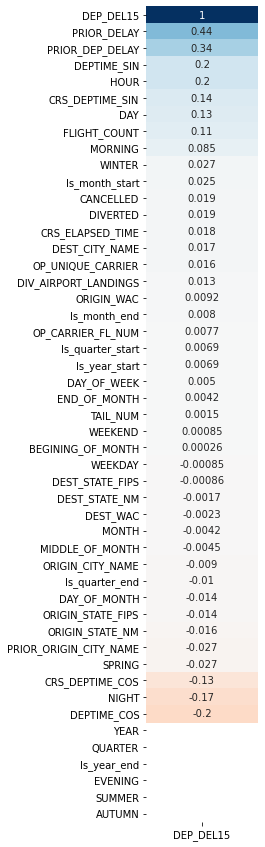

In [32]:
plt.figure(figsize=(2, 15))
sns.heatmap(df.corr()[['DEP_DEL15']].sort_values('DEP_DEL15', ascending=False), 
            cmap='RdBu', # color of the map (red/blue)
            vmin=-1, # values to anchor the colormap are from -1 to 1
            vmax=1,
            annot=True, # writing the data value in each cell
           cbar=False); # no colorbar drawing

In [33]:
df.shape

(1705725, 49)

In [34]:
df.to_csv('04_Pre_Processed.csv', index = False)